<a href="https://colab.research.google.com/github/kwakyosong/KOSA_KDT/blob/main/KDT_day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# 최소 제곱 추정량 (OLS)

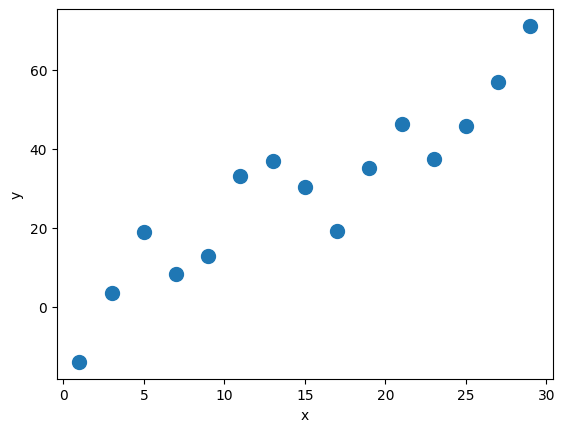

In [11]:
x = np.arange(1,30,2)
y = 2*x  + 1

y_random = y + np.random.normal(0,8 ,len(x))

plt.xlabel("x")
plt.ylabel("y")
plt.plot(x,y_random,".",markersize=20)